In [1]:
import psycopg2
import pandas as pd
import numpy as np
import mariadb
import json
import os
import shutil
import subprocess
from pathlib import Path
import pyodbc
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
import pickle
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns

In [2]:
conn_lims = pyodbc.connect("Driver={SQL Server};"
                            "Server=192.168.5.18\CROPNUT;"
                            "Database=cropnuts;"
                            "uid=thomasTsuma;pwd=GR^KX$uRe9#JwLc6")

cursor = conn_lims.cursor()

In [3]:
chemicals = pd.read_sql("SELECT chemical_name, chemical_symbol FROM Chemicals",con=conn_lims)
chemicals['chemical_name'] = [ str(i).strip().lower().replace(" ","_").replace("(","").replace(")","").replace(".","").strip() for i in chemicals['chemical_name']]

C:\Users\tsuma.thomas\AppData\Local\Temp\ipykernel_30644\3394265155.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  chemicals = pd.read_sql("SELECT chemical_name, chemical_symbol FROM Chemicals",con=conn_lims)


In [4]:
analysisDetails = pd.read_csv("output/analysis_chemicals.csv")

In [5]:
analysisDetails.analysis_name = [ i.replace(":","") for i in analysisDetails.analysis_name ]

In [6]:
analysisDetails['chemical_name'] = [ i.replace("'","").replace("[","").replace("]","").split(",") for i in analysisDetails['chemical_name'] ]

In [7]:
analysisDetails = analysisDetails.set_index("analysis_name")

In [8]:
analysisDetails = analysisDetails.to_dict()['chemical_name']

In [9]:
analysisDetails['Aluminium Analysis (Media)'] = analysisDetails['Aluminium Analysis']

In [10]:
hydroponics_df = pd.read_csv("output/hydroponics_analysis_cleaned.csv")

In [11]:
hydroponics_df.chemical_name.value_counts()

chemical_name
electrical_conductivity        102582
molybdenum                      90717
copper                          90717
zinc                            90717
boron                           90711
potassium                       90526
sodium                          90509
calcium                         90482
manganese                       90476
phosphorus                      90476
iron                            90476
sulphur                         90473
magnesium                       90473
bicarbonate                     90430
nitrate_n                       90427
ammonium                        90391
silicon                         90329
chlorides                       51968
chloride                        36754
nitrates                        17177
ph                               1149
fluoride                          524
cadmium                           241
cobalt                            241
chromium                          241
arsenic                           24

In [12]:
hydroponics_df = pd.merge(chemicals,hydroponics_df,on="chemical_name", how="inner")

In [13]:
hydroponics_df.chemical_name.value_counts()

chemical_name
electrical_conductivity        102582
zinc                            90717
molybdenum                      90717
copper                          90717
boron                           90711
potassium                       90526
sodium                          90509
calcium                         90482
phosphorus                      90476
iron                            90476
manganese                       90476
sulphur                         90473
magnesium                       90473
bicarbonate                     90430
nitrate_n                       90427
ammonium                        90391
silicon                         90329
chloride                        36754
nitrates                        17177
ph                               1149
fluoride                          524
cadmium                           241
cobalt                            241
arsenic                           241
lead                              241
nickel                            24

In [14]:
df = pd.DataFrame()


In [15]:
# for index,row in hydroponics_df.iterrows():
#     sample = row['sample_code']
#     if sample in df['sample_code'].values:
#         continue   
#     units = row['unit_name']
#     chemical = row['chemical_symbol']
#     result = row['result']
#     if units == "ppm":
#         sql = f"""
#         SELECT [dbo].[Calculate_Conversion] ({result}, '{chemical}') 
#         """
#         converted = cursor.execute(sql).fetchone()[0]
#         row['unit_name'] = "mmol/l"
#         row['result'] = converted
#         df = pd.concat([df, pd.DataFrame(row).T])
#     else:
#         df = pd.concat([df, pd.DataFrame(row).T])        
        

In [16]:
df

""


In [17]:
hydroponics_df.analysis_name.value_counts().to_csv("output/analysis_value_counts.csv")

In [18]:
hydroponics_df.analysis_name = [ str(i).strip() for i in hydroponics_df.analysis_name]

In [19]:
hydroponics_df['analysis_name'] = [i.replace(":","") for i in hydroponics_df['analysis_name']]
hydroponics_df['result'] = [ float(str(i).replace("<","").replace(">","")) for i in hydroponics_df['result'] ]

In [20]:
hydroponics_df.sort_values('batch_date')

,chemical_name,chemical_symbol,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,sample_code,batch_date,analysis_name,result,unit_name
1066674,phosphorus,P,172579,22480,22480,CF006HY0130,2011-06-09 00:00:00.000,Drip Water Analysis,23.000,ppm
704047,boron,B,172573,22486,22486,CF006HY0130,2011-06-09 00:00:00.000,Drip Water Analysis,0.240,ppm
704048,boron,B,172585,22449,22449,CF006HY0131,2011-06-09 00:00:00.000,Drip Water Analysis,0.030,ppm
1574752,silicon,Si,172554,22463,22463,CF006HY0130,2011-06-09 00:00:00.000,Drip Water Analysis,0.010,ppm
1574751,silicon,Si,172551,22454,22454,CF006HY0131,2011-06-09 00:00:00.000,Drip Water Analysis,0.010,ppm
...,...,...,...,...,...,...,...,...,...,...
1078781,phosphorus,P,172524,485270,485270,CZ09HY0011,2025-02-07 09:48:00.000,Substrate Analysis (Pumice) 11.5 Volume Extract,1.190,ppm
1078782,phosphorus,P,172531,485278,485278,CZ09HY0009,2025-02-07 09:48:00.000,Substrate Analysis (Pumice) 11.5 Volume Extract,1.970,ppm
1508108,electrical_conductivity,EC,172490,485273,485273,CZ09HY0009,2025-02-07 09:48:00.000,Substrate Analysis (Pumice) 11.5 Volume Extract,0.890,mS/cm
534966,manganese,Mn,172545,491421,491421,CZ09HY0009,2025-02-07 09:48:00.000,Substrate Analysis (Pumice) 11.5 Volume Extract,0.026,ppm


In [21]:
new_samples_df = hydroponics_df.loc[hydroponics_df['batch_date'] > '2024-08-21'] 
hydroponics_df = hydroponics_df.loc[hydroponics_df['batch_date'] <= '2024-08-21'] 

In [22]:
new_samples_df.chemical_name.value_counts()

chemical_name
electrical_conductivity        6096
sodium                         2333
potassium                      2302
iron                           2302
silicon                        2302
calcium                        2302
nitrate_n                      2302
bicarbonate                    2302
phosphorus                     2302
ammonium                       2302
molybdenum                     2302
boron                          2302
copper                         2302
manganese                      2302
sulphur                        2302
magnesium                      2302
zinc                           2302
chloride                       2248
nitrates                       1582
total_coliforms                  16
e_coli                           16
pseudomonas_aeruginosa           13
staphylococcus_aureus            13
shigella                         13
sulphite_reducing_anaerobes      13
listeria_monocytogenes           13
salmonella_spp                   13
sulphate      

In [23]:
hydroponics_df.chemical_name.value_counts()

chemical_name
electrical_conductivity    96486
zinc                       88415
copper                     88415
molybdenum                 88415
boron                      88409
potassium                  88224
calcium                    88180
sodium                     88176
manganese                  88174
iron                       88174
phosphorus                 88174
sulphur                    88171
magnesium                  88171
bicarbonate                88128
nitrate_n                  88125
ammonium                   88089
silicon                    88027
chloride                   34506
nitrates                   15595
ph                          1149
fluoride                     524
chromium                     241
nickel                       241
lead                         241
cadmium                      241
arsenic                      241
cobalt                       241
aluminium                    113
e_coli                        34
total_coliforms              

In [24]:
hydroponics_df.analysis_name.value_counts().to_csv("output/modelling_analysis_value_counts.csv")
new_samples_df.analysis_name.value_counts().to_csv("output/test_analysis_value_counts.csv")

In [25]:
os.makedirs("output/analysis",exist_ok=True)
os.makedirs("output/chemical_null_count",exist_ok=True)
electrical_conductivity_thresholds = {}

for analysis in np.unique(hydroponics_df['analysis_name']):
    print(analysis)
    if analysis not in analysisDetails.keys():
        continue
    df_ = hydroponics_df.loc[hydroponics_df['analysis_name']==analysis]
    print(df_.chemical_name.unique())
    
    df_ = pd.pivot_table(data=df_, values="result", index="sample_code", columns="chemical_name")
    df_ = df_[[ j.strip() for j in analysisDetails[analysis] if j.strip() in df_.columns]]
    df_ = df_.loc[:, ~df_.columns.duplicated()]

    os.makedirs(f"output/boxplots/{analysis}",exist_ok=True)
    for column in df_.columns:  
        if column in "electrical_conductivity":
            electrical_conductivity_thresholds[analysis] = {}
            electrical_conductivity_thresholds[analysis]["electrical_conductivity"] = df_[column].quantile(0.75)
            if "calcium" in df_.columns:
                electrical_conductivity_thresholds[analysis]["calcium"] = df_["calcium"].quantile(0.75)
            if "magnesium" in df_.columns:
                electrical_conductivity_thresholds[analysis]["magnesium"] = df_["magnesium"].quantile(0.75)
            if "magnesium" in df_.columns:
                electrical_conductivity_thresholds[analysis]["potassium"] = df_["magnesium"].quantile(0.75)
            if "calcium_sulphate_caso4" in df_.columns:
                electrical_conductivity_thresholds[analysis]["calcium_sulphate_caso4"] = df_["calcium_sulphate_caso4"].quantile(0.75)
        plt.boxplot(df_[column])
        plt.savefig(f"output/boxplots/{analysis}/{column}.png")
        plt.clf()
        outlier_threshold = df_[column].quantile(0.99)
        # df_ = df_.loc[df_[column] <= outlier_threshold]

    if len(df_.columns) == 0:
        continue
    df_.describe().to_csv(f"output/chemical_null_count/{analysis}.csv")
    
    df_.to_csv(f"output/analysis/{analysis}.csv")


Alkalinity
['potassium' 'calcium' 'sodium' 'magnesium' 'sulphur' 'manganese' 'copper'
 'boron' 'zinc' 'molybdenum' 'iron' 'phosphorus' 'chloride' 'bicarbonate'
 'nitrates' 'nitrate_n' 'ammonium' 'electrical_conductivity' 'silicon'
 'fluoride']
Aluminium Analysis
['potassium' 'calcium' 'sodium' 'magnesium' 'sulphur' 'manganese' 'copper'
 'boron' 'zinc' 'molybdenum' 'iron' 'phosphorus' 'chloride' 'bicarbonate'
 'nitrates' 'nitrate_n' 'ammonium' 'electrical_conductivity' 'aluminium'
 'silicon']
Aluminium Analysis (Media)
['potassium' 'calcium' 'sodium' 'magnesium' 'sulphur' 'manganese' 'copper'
 'boron' 'zinc' 'molybdenum' 'iron' 'phosphorus' 'chloride' 'bicarbonate'
 'nitrates' 'nitrate_n' 'ammonium' 'sulphate' 'chromium' 'nickel' 'lead'
 'cadmium' 'arsenic' 'cobalt' 'electrical_conductivity' 'selenium'
 'aluminium' 'silicon' 'fluoride' 'mercury']
Aqua regia - Selected elements (ICP) Analysis
['potassium' 'calcium' 'sodium' 'magnesium' 'sulphur' 'manganese' 'copper'
 'boron' 'zinc' 'moly

<Figure size 640x480 with 0 Axes>

In [26]:
electrical_conductivity_thresholds

{'Drain Water Analysis': {'electrical_conductivity': 2.6,
  'calcium': 202.0,
  'magnesium': 71.1,
  'potassium': 71.1},
 'Drip Water Analysis': {'electrical_conductivity': 2.16,
  'calcium': 162.0,
  'magnesium': 52.9,
  'potassium': 52.9},
 'EC Analysis': {'electrical_conductivity': 2.58},
 'Raw irrigation water analysis (for fertigation)': {'electrical_conductivity': 0.45,
  'calcium': 21.1,
  'magnesium': 5.01,
  'potassium': 5.01},
 'Recycle Water Analysis': {'electrical_conductivity': 2.33,
  'calcium': 169.0,
  'magnesium': 55.0,
  'potassium': 55.0},
 'Substrate Analysis (Cocos) 11.5 Volume Extract': {'electrical_conductivity': 2.43,
  'calcium': 178.0,
  'magnesium': 59.0,
  'potassium': 59.0},
 'Substrate Analysis (Pumice) 11.5 Volume Extract': {'electrical_conductivity': 2.49,
  'calcium': 178.0,
  'magnesium': 54.5,
  'potassium': 54.5}}

In [27]:
pickle.dump(electrical_conductivity_thresholds, open("electrical_conductivity_thresholds","wb"))

In [28]:
os.makedirs("./output/analysis_imputed",exist_ok=True)
os.makedirs("./output/pca_plots",exist_ok=True)
os.makedirs("./output/pca_df",exist_ok=True)
os.makedirs("./output/analysis_scaled",exist_ok=True)

In [29]:
os.makedirs("./models/imputers",exist_ok=True)
os.makedirs("./models/scalers",exist_ok=True)
os.makedirs("./models/pca",exist_ok=True)

Alkalinity.csv
Aluminium Analysis (Media).csv
Aluminium Analysis.csv
Aqua regia - Selected elements (ICP) Analysis.csv
Number of components explaining 95% variance: 4
Biochemical Oxygen Demand.csv
Biuret test.csv
Chemical Oxygen Demand.csv
Number of components explaining 95% variance: 2
Drain Water Analysis.csv
Number of components explaining 95% variance: 11
Drip Water Analysis.csv
Number of components explaining 95% variance: 10
E coli & Total Coliforms.csv
Number of components explaining 95% variance: 1
EC Analysis.csv
Fibre Analysis.csv
Fluoride Analysis (Drain).csv
Fluoride Analysis (Media).csv
Number of components explaining 95% variance: 2
Fluoride Analysis.csv
Number of components explaining 95% variance: 2
Heavy metals in Hydroponics.csv
Number of components explaining 95% variance: 6
Organic Matter.csv
Raw irrigation water analysis (for fertigation).csv
Number of components explaining 95% variance: 11
Recycle Water Analysis.csv
Number of components explaining 95% variance: 11

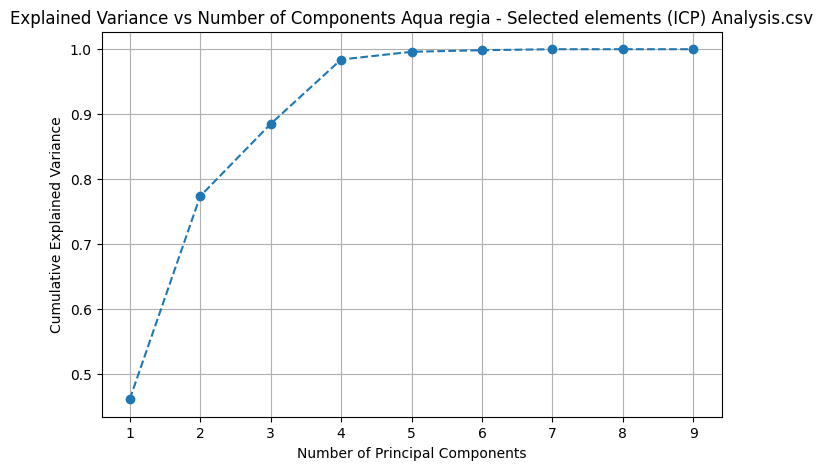

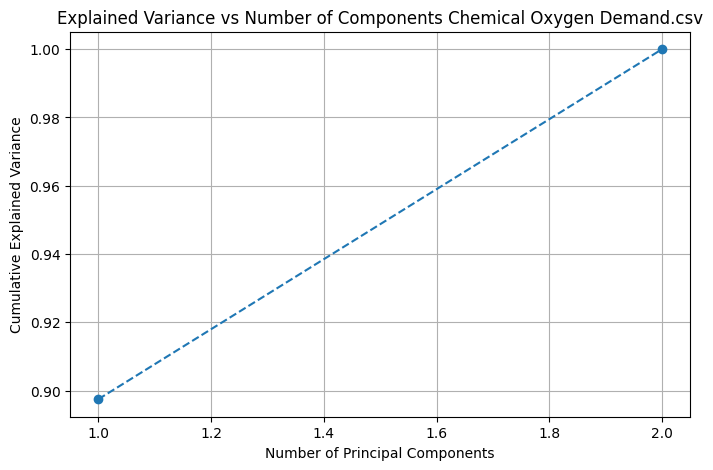

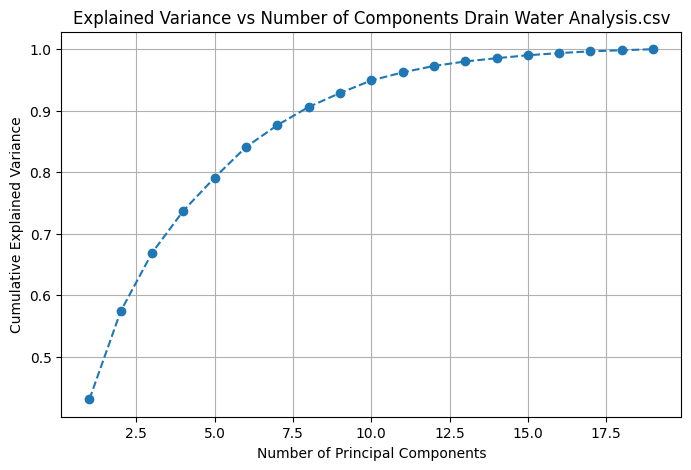

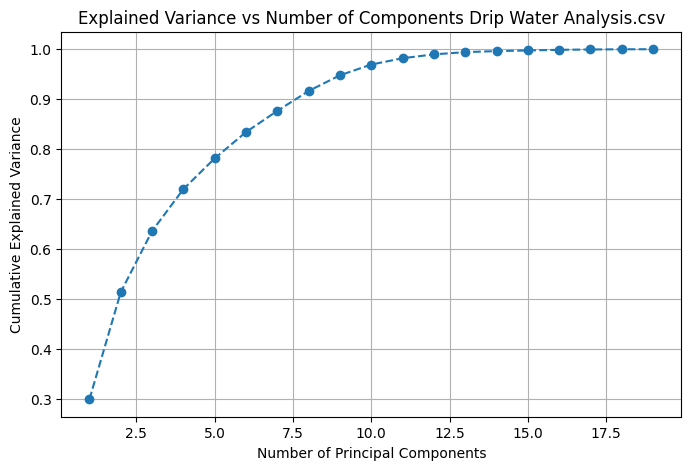

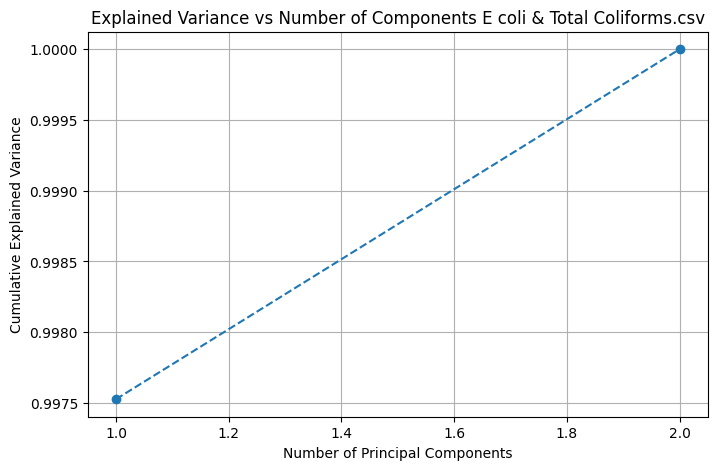

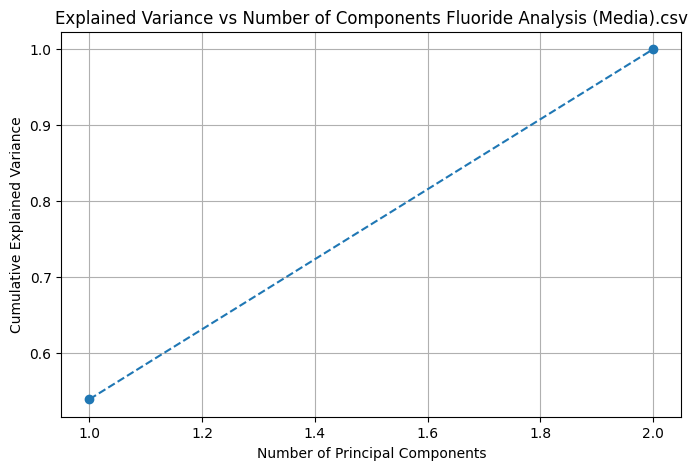

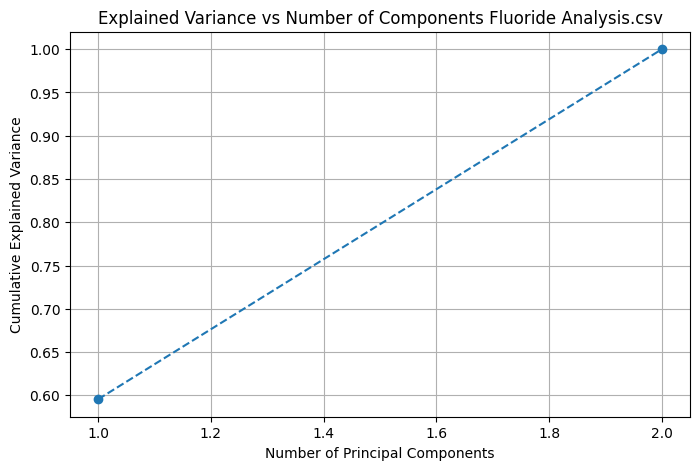

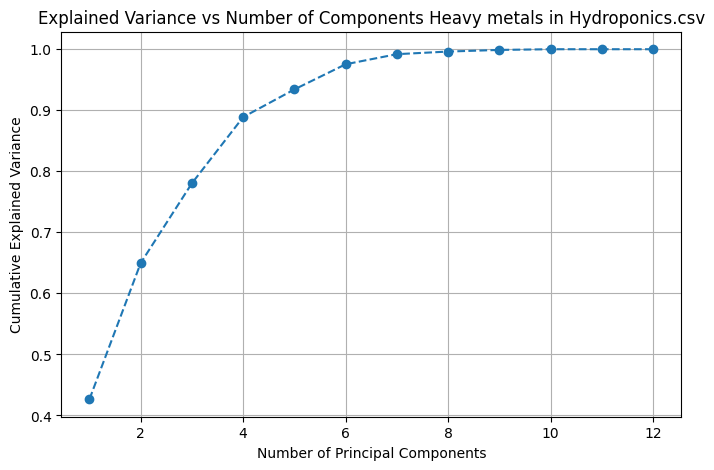

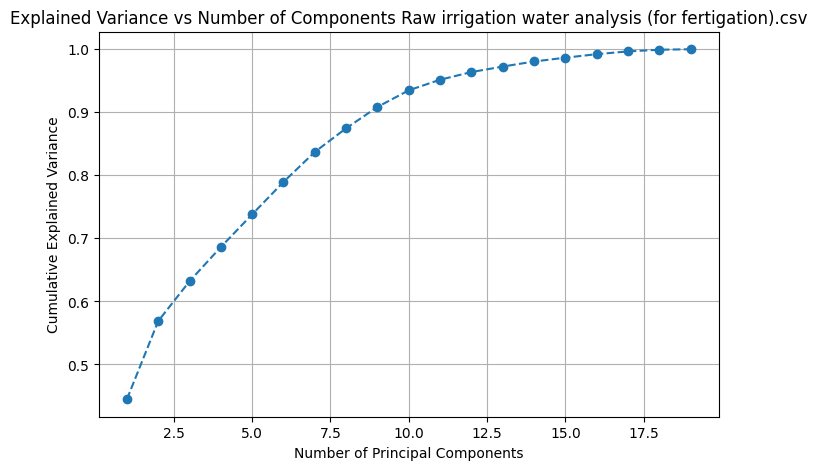

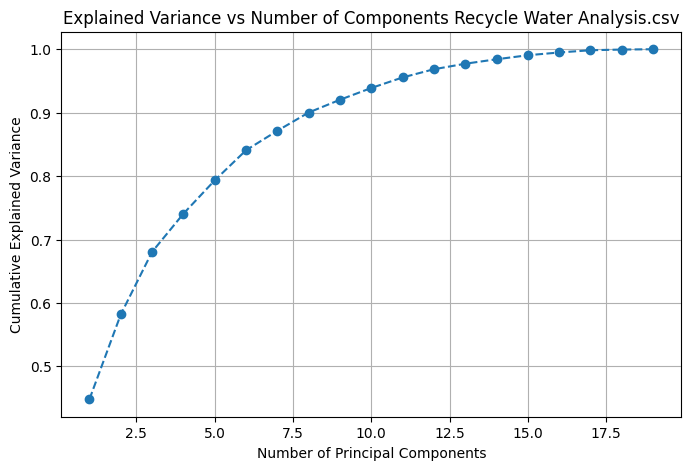

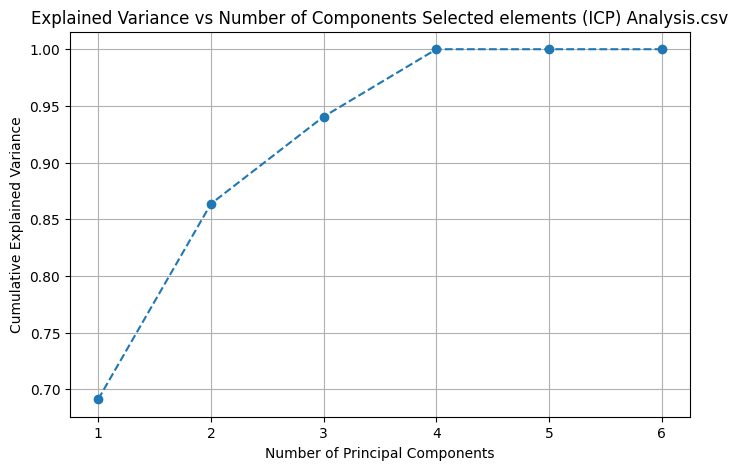

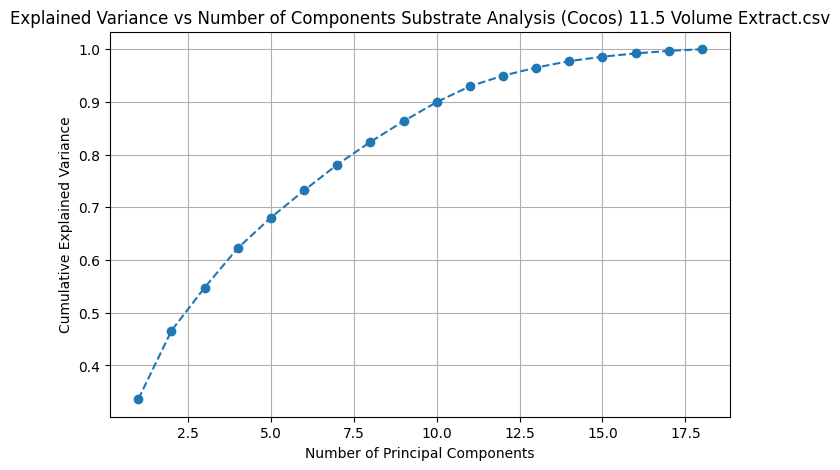

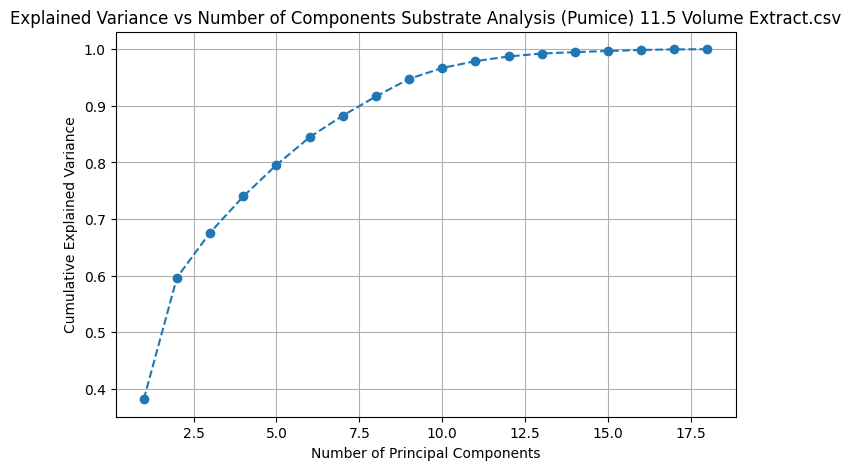

In [30]:
for analysis_file in os.listdir("output/analysis"):
    print(analysis_file)
    analysis_df = pd.read_csv(f"output/analysis/{analysis_file}",index_col=0)
    analysis_df = analysis_df.loc[analysis_df.index.isin(hydroponics_df.sample_code)]
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    # analysis_df = pd.DataFrame(imp_mean.fit_transform(analysis_df), columns=analysis_df.columns, index=analysis_df.index)
    analysis_df = pd.DataFrame(imp_mean.fit_transform(analysis_df), index=analysis_df.index)
    analysis_df.to_csv(f"./output/analysis_imputed/{analysis_file}")
    pickle.dump(imp_mean, open(f"models/imputers/{analysis_file.replace('csv','pkl')}","wb"))
    # if(len(analysis_df) == 0):
    #     continue
    if(len(analysis_df.columns) == 1):
        continue
    sc = StandardScaler()
    pca = PCA()
    analysis_scaled = sc.fit_transform(analysis_df)
    pca.fit(analysis_scaled)
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title(f'Explained Variance vs Number of Components {analysis_file}')
    plt.grid(True)
    plt.savefig(f"./output/pca_plots/{analysis_file.replace('.csv','.png')}")
    n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
    print(f'Number of components explaining 95% variance: {n_components}')
    
    pca = PCA(n_components=n_components)
    pca_reduced_df = pca.fit_transform(analysis_scaled)
    analysis_scaled = pd.DataFrame(analysis_scaled,index=analysis_df.index)
    analysis_scaled.to_csv(f"output/analysis_scaled/{analysis_file}")
    np.save(f"output/pca_df/{analysis_file.replace('.csv','')}", pca_reduced_df)
    pickle.dump(sc, open(f"models/scalers/{analysis_file.replace('csv','pkl')}","wb"))
    pickle.dump(pca, open(f"models/pca/{analysis_file.replace('csv','pkl')}","wb"))

In [31]:
os.makedirs("./output/mahalanobis_distance",exist_ok=True)

In [32]:
for analysis_file in os.listdir("output/pca_df"):
    print(analysis_file)
    pca_reduced_df = pd.DataFrame(np.load(f"output/pca_df/{analysis_file}"))
    if len(pca_reduced_df.columns) <= 2:
        continue
    mu = np.mean(pca_reduced_df, axis=0)
    sigma = np.cov(pca_reduced_df.T)
    pca_reduced_df['mahalanobis_distance'] = [distance.mahalanobis(pca_reduced_df.iloc[i], mu, np.linalg.inv(sigma)) for i in range(len(pca_reduced_df)) ]

    pd.DataFrame(pca_reduced_df).to_csv(f"output/mahalanobis_distance/{analysis_file.replace('.npy','')}.csv")

Aqua regia - Selected elements (ICP) Analysis.npy
Chemical Oxygen Demand.npy
Drain Water Analysis.npy
Drip Water Analysis.npy
E coli & Total Coliforms.npy
Fluoride Analysis (Media).npy
Fluoride Analysis.npy
Heavy metals in Hydroponics.npy
Raw irrigation water analysis (for fertigation).npy
Recycle Water Analysis.npy
Selected elements (ICP) Analysis.npy
Substrate Analysis (Cocos) 11.5 Volume Extract.npy
Substrate Analysis (Pumice) 11.5 Volume Extract.npy


In [33]:
os.makedirs("output/mahanobis_distance_upper_quantile",exist_ok=True)
os.makedirs("output/mahalanobis_boxplots",exist_ok=True)

In [34]:
mahalanobis_threshold_dict = {}
for analysis_file in os.listdir("output/mahalanobis_distance"):
    print(analysis_file)
    analysis = analysis_file.replace(".csv","")
    mahalanobis_df = pd.read_csv(f"output/mahalanobis_distance/{analysis_file}",index_col=0)
    upper_quantile = (mahalanobis_df['mahalanobis_distance'].quantile(0.95))
    mahalanobis_threshold_dict[analysis_file.replace(".csv","")] = upper_quantile
    mahalanobis_df.loc[mahalanobis_df['mahalanobis_distance'] >= upper_quantile].to_csv(f"output/mahanobis_distance_upper_quantile/{analysis_file}")
    plt.boxplot(mahalanobis_df['mahalanobis_distance'])
    plt.axhline(y=upper_quantile, color='red', linestyle='--', label=f'Threshold at {upper_quantile}')
    plt.title(f"Mahalanobis Threshold = {round(upper_quantile,2)}")
    plt.savefig(f"output/mahalanobis_boxplots/{analysis}.png")
    plt.clf()
pickle.dump(mahalanobis_threshold_dict, open("mahalanobis_thresholds.dict","wb"))

Aqua regia - Selected elements (ICP) Analysis.csv
Drain Water Analysis.csv
Drip Water Analysis.csv
Heavy metals in Hydroponics.csv
Raw irrigation water analysis (for fertigation).csv
Recycle Water Analysis.csv
Selected elements (ICP) Analysis.csv
Substrate Analysis (Cocos) 11.5 Volume Extract.csv
Substrate Analysis (Pumice) 11.5 Volume Extract.csv


<Figure size 640x480 with 0 Axes>

In [35]:
pd.DataFrame({'analysis_name':(mahalanobis_threshold_dict.keys())}).to_csv("output/analysis_names_send_to_thomas_and_josephine.csv")

In [36]:
conn_lims = pyodbc.connect("Driver={SQL Server};"
                            "Server=192.168.5.18\CROPNUT;"
                            "Database=cropnuts;"
                            "uid=thomasTsuma;pwd=GR^KX$uRe9#JwLc6")

In [37]:
reverse_analysis_dict = pd.read_sql(f"""SELECT analysis_id, LTRIM(RTRIM(analysis_name)) as analysis_name FROM Analysis ORDER BY analysis_name""",con=conn_lims).set_index("analysis_name").to_dict()['analysis_id']
reverse_analysis_dict

C:\Users\tsuma.thomas\AppData\Local\Temp\ipykernel_30644\3771434913.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  reverse_analysis_dict = pd.read_sql(f"""SELECT analysis_id, LTRIM(RTRIM(analysis_name)) as analysis_name FROM Analysis ORDER BY analysis_name""",con=conn_lims).set_index("analysis_name").to_dict()['analysis_id']


{'% Gypsum': 540,
 '% Nitrogen (RSSP 2)': 647,
 '% Organic Matter': 258,
 '% Organic Matter (RSSP 2)': 646,
 '% Soil Nitrogen': 18,
 '%Assay': 27490,
 '%N (RSSP 2)': 652,
 '%OM (RSSP 2)': 651,
 '%P,%S Analysis(Super Calcium)': 383,
 '1:2 Soil Volume Extract': 294,
 '1:2 soil volume extract': 25,
 '1:2 Soil Volume Extract (Data Only)': 27339,
 '1:2 Vol Extract for BLGG': 317,
 '20:12:12 (N,P205,K20) Analysis': 840,
 'Absorbance at 254nm': 26936,
 'Acid Detergent Fibre': 27063,
 'Acid Insoluble Ash': 27417,
 'Acid Insoluble Matter': 27108,
 'Acid titration': 26647,
 'Acid Value': 26971,
 'Advanced Biological Farming Soil Audit': 26521,
 'Advanced Soil Health Analysis': 27181,
 'Aerobic Mesophilic Count': 26649,
 'Aflatoxin': 26794,
 'Aflatoxin AFB1': 26938,
 'Aflatoxin B1': 26939,
 'Aflatoxin in feed': 767,
 'Aflatoxin M1': 27469,
 'Aflatoxin Total': 766,
 'AfSIS Standard Leaf Analysis': 633,
 'AFSIS Std Wet Chemistry Soil Analysis': 589,
 'Aggregate Stability': 26727,
 'Agrifi Soil Micr

In [38]:
for analysis in reverse_analysis_dict.copy().keys():
    if ":" in analysis:
        reverse_analysis_dict[analysis.replace(":","")] = reverse_analysis_dict[analysis]

In [39]:
test = []

In [40]:
new_samples = pd.read_sql(f"SELECT sample_code, batch_date, result, unit_name, chemical_name, analysis_name FROM SampleResults WHERE sample_code IN {tuple(new_samples_df.sample_code.values)}", con=conn_lims)

C:\Users\tsuma.thomas\AppData\Local\Temp\ipykernel_30644\1881003016.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  new_samples = pd.read_sql(f"SELECT sample_code, batch_date, result, unit_name, chemical_name, analysis_name FROM SampleResults WHERE sample_code IN {tuple(new_samples_df.sample_code.values)}", con=conn_lims)


In [41]:
new_samples = new_samples.dropna(subset=['chemical_name','result','analysis_name'])
new_samples['analysis_name'] = [ str(i).replace(":","").split(",") for i in new_samples.analysis_name ]
new_samples = new_samples.explode("analysis_name")

In [42]:
new_samples['result'] = [ str(i).replace("<","").replace(">","").strip() for i in new_samples['result'] ]

In [43]:
new_samples.loc[(new_samples['result'] == "ND"), "result" ] = 0

In [44]:
new_samples = new_samples.loc[~(new_samples['result'] == "Detected") ]

In [45]:
new_samples['unit_name'] = [ str(i).strip() for i in new_samples['unit_name'].values ]

In [46]:
new_samples['chemical_name'] = [ str(i).lower().replace(" ","_").replace("(","").replace(")","").replace(".","").strip() for i in new_samples['chemical_name'].values ]

In [47]:
new_samples['result'] = new_samples['result'].astype(float)

In [48]:
test = []
for sample in new_samples.sample_code.unique():
    res = {}
    tmp_ = new_samples.loc[new_samples.sample_code == sample]
    res['sample_code'] = sample
    print([ i for i in tmp_.analysis_name.unique() ])
    res['analysis_id'] = [ reverse_analysis_dict[i] for i in tmp_.analysis_name.unique() if i in reverse_analysis_dict.keys() ]
    for index,row in tmp_.iterrows():
        if row['result'] >= 0 :
            res[row['chemical_name']] = {'result': row['result'], 'units': str(row['unit_name'])}
        else:
            res[row['chemical_name']] = {'result': 0, 'units': row['unit_name']}
    test.append(res)    


['Drain Water Analysis']
['Drip Water Analysis']
['Drain Water Analysis']
['Substrate Analysis (Cocos) 11.5 Volume Extract']
['Drip Water Analysis']
['Drip Water Analysis']
['Drain Water Analysis']
['Drip Water Analysis']
['Drain Water Analysis']
['Drip Water Analysis']
['Drain Water Analysis']
['Drip Water Analysis']
['Drain Water Analysis']
['Drain Water Analysis']
['Drip Water Analysis']
['Drain Water Analysis']
['Substrate Analysis (Cocos) 11.5 Volume Extract']
['Substrate Analysis (Cocos) 11.5 Volume Extract']
['Drip Water Analysis']
['Drain Water Analysis']
['Drip Water Analysis']
['Recycle Water Analysis']
['Raw irrigation water analysis (for fertigation)']
['Drip Water Analysis']
['Drain Water Analysis']
['Drip Water Analysis']
['Drip Water Analysis']
['Drain Water Analysis']
['Drip Water Analysis']
['Drain Water Analysis']
['Drain Water Analysis']
['Drip Water Analysis']
['Drain Water Analysis']
['Substrate Analysis (Pumice) 11.5 Volume Extract']
['Raw irrigation water analysi

In [49]:
(test)

[{'sample_code': 'CB047HY0438',
  'analysis_id': [255],
  'electrical_conductivity': {'result': 1.97, 'units': 'mS/cm'},
  'manganese': {'result': 0.19, 'units': 'ppm'},
  'zinc': {'result': 0.17, 'units': 'ppm'},
  'boron': {'result': 0.33, 'units': 'ppm'},
  'copper': {'result': 0.13, 'units': 'ppm'},
  'molybdenum': {'result': 0.083, 'units': 'ppm'},
  'sodium': {'result': 161.0, 'units': 'ppm'},
  'chloride': {'result': 26.5, 'units': 'ppm'},
  'bicarbonate': {'result': 105.0, 'units': 'ppm'},
  'silicon__': {'result': 36.8, 'units': 'ppm'},
  'sar': {'result': 3.61, 'units': 'None'},
  'ammonium': {'result': 4.98, 'units': 'ppm'},
  'calcium': {'result': 107.0, 'units': 'ppm'},
  'magnesium': {'result': 26.3, 'units': 'ppm'},
  'potassium': {'result': 138.0, 'units': 'ppm'},
  'phosphorus': {'result': 20.6, 'units': 'ppm'},
  'nitrate_n': {'result': 138.0, 'units': 'ppm'},
  'nitrates': {'result': 611.0, 'units': 'ppm'},
  'sulphur': {'result': 114.0, 'units': 'ppm'},
  'iron': {'

In [50]:
# reverse_analysis_dict['1:2 Soil Volume Extract'] 

In [51]:
analysis_dict = pd.read_sql(f"""SELECT analysis_id, LTRIM(RTRIM(analysis_name)) as analysis_name FROM Analysis  ORDER BY analysis_name""",con=conn_lims).set_index("analysis_id").to_dict()['analysis_name']

C:\Users\tsuma.thomas\AppData\Local\Temp\ipykernel_30644\132348878.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  analysis_dict = pd.read_sql(f"""SELECT analysis_id, LTRIM(RTRIM(analysis_name)) as analysis_name FROM Analysis  ORDER BY analysis_name""",con=conn_lims).set_index("analysis_id").to_dict()['analysis_name']


In [52]:
pickle.dump(analysis_dict, open("analysis.dict","wb"))

In [53]:
analysis_dict = pickle.load(open("analysis.dict","rb"))

In [54]:
mahalanobis_thresholds = pickle.load(open("mahalanobis_thresholds.dict","rb"))

In [55]:
pd.DataFrame({'analysis_name':mahalanobis_thresholds.keys()}).to_csv("output/analyses_in_models.csv")

In [56]:
unit_decision = pd.read_csv("output/sgf_unit_per_chemical_decision.csv")

In [57]:
ppmmol_df = pd.read_csv("ppm-mmol.csv")

In [69]:
conversion_dict_records = ppmmol_df.to_dict("records")

In [70]:
conversion_dict_records

[{'Element': 'Al',
  'Molecular weight': 26.982,
  'Ppm to Mmol/L multiply value by;': 0.0371,
  'LIMS Molecular weight': 26.98,
  'Conversion': '0.0371*1000',
  'unit': 'µmol'},
 {'Element': 'B',
  'Molecular weight': 10.806,
  'Ppm to Mmol/L multiply value by;': 0.0925,
  'LIMS Molecular weight': 10.8,
  'Conversion': '0.0925*1000',
  'unit': 'µmol'},
 {'Element': 'Ca',
  'Molecular weight': 40.08,
  'Ppm to Mmol/L multiply value by;': 0.025,
  'LIMS Molecular weight': 40.1,
  'Conversion': 'OK',
  'unit': 'mmol'},
 {'Element': 'Cl',
  'Molecular weight': 35.453,
  'Ppm to Mmol/L multiply value by;': 0.0282,
  'LIMS Molecular weight': 35.5,
  'Conversion': 'OK',
  'unit': 'mmol'},
 {'Element': 'CO3',
  'Molecular weight': 60.008,
  'Ppm to Mmol/L multiply value by;': 0.0167,
  'LIMS Molecular weight': nan,
  'Conversion': 'Not implemented in LIMS',
  'unit': nan},
 {'Element': 'Cu',
  'Molecular weight': 63.546,
  'Ppm to Mmol/L multiply value by;': 0.0157,
  'LIMS Molecular weight':

In [58]:
# conversion_dict = ppmmol_df[['Element','Ppm to Mmol/L multiply value by;']].set_index("Element").to_dict()['Ppm to Mmol/L multiply value by;']
# conversion_dict

{'Al': 0.0371,
 'B': 0.0925,
 'Ca': 0.025,
 'Cl': 0.0282,
 'CO3': 0.0167,
 'Cu': 0.0157,
 'Fe': 0.0179,
 'HCO3': 0.0164,
 'K': 0.0256,
 'Mg': 0.0411,
 'Mn': 0.0182,
 'Mo': 0.0104,
 'N': 0.0714,
 'Na': 0.0435,
 'NH4': 0.0554,
 'NO2': 0.0217,
 'NO3N': 0.2259,
 'NO3': 0.2259,
 'OH': 0.0588,
 'P': 0.0323,
 'PO4': 0.0105,
 'S': 0.0312,
 'Si': 0.0356,
 'SO4': 0.0104,
 'Zn': 0.0153}

In [59]:
chemicals['chemical_symbol'] = [ str(i).strip() for i in chemicals['chemical_symbol']]

In [60]:
chemicals_dict = chemicals.set_index("chemical_name").to_dict()['chemical_symbol']
chemicals_dict

{'potassium': 'K',
 'ph': 'pH',
 'calcium': 'Ca',
 'sodium': 'Na',
 'magnesium': 'Mg',
 'cec': 'C.E.C',
 'sulphur': 'S',
 'manganese': 'Mn',
 'copper': 'Cu',
 'boron': 'B',
 'zinc': 'Zn',
 'molybdenum': 'Mo',
 'iron': 'Fe',
 'phosphorus_olsen': 'P(O)',
 'phosphorusbray1-sensor': 'P(S)',
 'organic_matter': 'OM',
 'phosphorus': 'P',
 'chloride': 'Cl',
 'carbonate': 'CO3',
 'bicarbonate': 'HCO3',
 'fluorine': 'F',
 'nitrates': 'NO3',
 'nitrate_n': 'NO3N',
 'nitrite_n': 'NO2N',
 'ammonium': 'NH4',
 'sulphate': 'SO4',
 'chromium': 'Cr',
 'nickel': 'Ni',
 'lead': 'Pb',
 'hydrogen': 'H',
 'phosphate': 'PO4',
 'sand': '%Sand',
 'silt': '%Silt',
 'clay': '%Clay',
 'stones': 'ST',
 'cadmium': 'Cd',
 'arsenic': 'As',
 'lithium': 'Li',
 'nobelium': 'No',
 'ci': 'Ci',
 'h2po4': 'h2po',
 'iodine': 'I',
 'cobalt': 'Co',
 'se': 'se',
 'nitrate_nitrogen': 'NON3',
 'total_dissolved_solids': 'TDS',
 'turbidity': 'TUB',
 'chlorine': 'Cln',
 'ammonia': 'NH3',
 'exch_acidity_kcl': 'EA',
 'electrical_conduct

In [74]:
req_body = test
_ = pd.DataFrame(req_body)
unit_decision = pd.read_csv("output/hydroponics_unit_per_chemical_decision.csv")
unit_decision.analysis_name = [ i.replace(":","") for i in unit_decision.analysis_name ]
analysis_dict = pickle.load(open("analysis.dict","rb"))
mahalanobis_thresholds = pickle.load(open("mahalanobis_thresholds.dict","rb"))
electrical_conductivity_thresholds = pickle.load(open("electrical_conductivity_thresholds","rb"))

result = {}
_df = _.explode('analysis_id', ignore_index=True)
cursor = conn_lims.cursor()
import math
for index,row in _df.iterrows():
    sample_code = row['sample_code']
    if sample_code not in result.keys():
        result[sample_code] = []
    if math.isnan(row['analysis_id']):
        result[sample_code].append({"sample_code": sample_code,"status":"warning", "message": f"Analysis not in specified", "details": f"Analysis id not provided", "analysis": None  })   
        continue
    row['analysis_name'] = analysis_dict[row['analysis_id']]
    analysis = row['analysis_name'].replace(":","")
    analysis_id = row['analysis_id']
    if analysis not in mahalanobis_thresholds.keys():
        result[sample_code].append({"sample_code": sample_code,"status":"warning", "message": f"Analysis not in models", "details": f"Analysis: {analysis} is not in the list of defined models", "analysis": row['analysis_name'] })   
        continue  
    row = row.dropna()
    scaler = pickle.load(open(f"models/scalers/{analysis}.pkl","rb"))
    pca = pickle.load(open(f"models/pca/{analysis}.pkl","rb"))
    imputer = pickle.load(open(f"models/imputers/{analysis}.pkl","rb"))
    analysis_df = pd.read_csv(f"output/analysis/{analysis}.csv",index_col=0)
    mahalanobis_distance_df = pd.read_csv(f"output/mahalanobis_distance/{analysis}.csv",index_col=0).drop("mahalanobis_distance",axis=1)

    

    try :
        tmp_df = pd.DataFrame(row).T[analysis_df.columns]
    except Exception as e:
        result[sample_code].append({"sample_code": sample_code,"status":"warning", "message": f"Missing parameters for analysis: {analysis}", "details": f"Missing parameters: {','.join([ i for i in analysis_df.columns if i not in row.dropna().index])} for analysis: {analysis}", "analysis": row['analysis_name']})
        continue
    failed_units_comparison = {}    
    for col in tmp_df.columns:
        expected_units = unit_decision.loc[(unit_decision['analysis_name'] == analysis) & (unit_decision['chemical_name'] == col)]
        if len(expected_units) == 0:
            continue
        # if row['sample_code'] == 'CN013SGF0150':
        #     print(row[col]['units'])
        val = row[col]['result']
        symbol = chemicals_dict[col.strip()].strip()
        print(symbol)

        import math
        if type(row[col]) != dict and math.isnan(row[col]):
            failed_units_comparison[col] = {}
            failed_units_comparison[col]['expected_units'] = expected_units['unit_name'].tolist()[0]
            failed_units_comparison[col]['units_provided'] = None
        elif symbol in [ i for i in conversion_dict.keys() ] and row[col]['units'] == "ppm" and expected_units['unit_name'].values[0] == "mmol/l":
            val = row[col]['result']
            sql = f"""
                SELECT [dbo].[Calculate_Conversion] ({val}, '{symbol}') 
            """
            converted = cursor.execute(sql).fetchone()[0]
            row[col]['units'] = "mmol/l"
            row[col]['result'] = converted
        elif symbol in [ i for i in conversion_dict.keys() ] and row[col]['units'] == "ppm" and expected_units['unit_name'].values[0] == "µmol/l":
            val = row[col]['result']
            sql = f"""
                SELECT [dbo].[Calculate_Conversion] ({val}, '{symbol}') 
            """
            converted = cursor.execute(sql).fetchone()[0] / 1000
            row[col]['units'] = "µmol/l"
            row[col]['result'] = converted
        elif symbol in [ i for i in conversion_dict.keys() ] and row[col]['units'] == "mmol/l" and expected_units['unit_name'].values[0] == "ppm":
            print("mmol")
            val = row[col]['result']
            conversion_dict = [ i for i in conversion_dict_records if i['Element'] == symbol ][0]
            factor = conversion_dict["Ppm to Mmol/L multiply value by;"]
            weight = conversion_dict["Molecular weight"]
            converted_val = (val * weight)
            row[col]['units'] = "ppm"
            row[col]['result'] = converted_val
        elif symbol in [ i for i in conversion_dict.keys() ] and row[col]['units'] == "µmol/l" and expected_units['unit_name'].values[0] == "ppm":
            print("mmol")
            val = row[col]['result']
            conversion_dict = [ i for i in conversion_dict_records if i['Element'] == symbol ][0]
            factor = conversion_dict["Ppm to Mmol/L multiply value by;"]
            weight = conversion_dict["Molecular weight"]
            converted_val = (val * weight)/1000
            row[col]['units'] = "ppm"
            row[col]['result'] = converted_val
        elif row[col]['units'] !=   expected_units['unit_name'].values[0] :
            failed_units_comparison[col] = {}
            failed_units_comparison[col]['expected_units'] = expected_units['unit_name'].tolist()[0]
            failed_units_comparison[col]['units_provided'] = row[col]['units']
        else:
            continue    
    if len(failed_units_comparison.keys()) > 0:
        result[sample_code].append({"sample_code": sample_code,"status":"warning", "message": f"Wrong units provided", "details": f"Expected units are {str(failed_units_comparison)} for analysis: {analysis}" , "analysis": row['analysis_name']})
        continue
    for col in analysis_df.columns:
        if type(row[col]) == dict:
            row[col] = row[col]['result']
    
    out_of_bounds_chems = [ ]
    for col in tmp_df.columns:
        if analysis not in electrical_conductivity_thresholds.keys():
            continue
        if col == "sample_code":
            continue
        if col != "electrical_conductivity":
            continue
        if row[col] > electrical_conductivity_thresholds[analysis]["electrical_conductivity"]:
            if "calcium" in electrical_conductivity_thresholds[analysis].keys() and row[col] >  electrical_conductivity_thresholds[analysis]['calcium']:
                out_of_bounds_chems.append("Calcium should be high")
            if "magnesium" in electrical_conductivity_thresholds[analysis].keys() and row[col] >  electrical_conductivity_thresholds[analysis]['calcium']:
                out_of_bounds_chems.append("Magnesium should be high")
            if "potassium" in electrical_conductivity_thresholds[analysis].keys() and row[col] >  electrical_conductivity_thresholds[analysis]['calcium']:
                out_of_bounds_chems.append("Potassium should be high")
    #         if row[col] > 105 or row[col] < 95:
    #             out_of_bounds_chems.append("ec_salts out of bounds. Allowed bounds are 95 - 105")
    #     if col == "Charge Balance":
    #         if row[col] < -1:
    #             out_of_bounds_chems.append("Charge Balance out of bounds. Allowed lower boundary is -10. ")       
    #     elif col.lower() == "total suspended solids" and row['analysis_name'].lower() == "total suspended solids":
    #         if row[col] > 1:
    #             out_of_bounds_chems.append("total suspended solids out of bounds. If analysis is total suspended solids is <1 then total suspended solids check should be <1  . ")         
    if len(out_of_bounds_chems) > 0:
        result[sample_code].append({"sample_code": sample_code,"status":"warning", "message": f"High EC cation check", "details": f"{'.'.join(out_of_bounds_chems)}", "analysis": row['analysis_name'] })
        continue    

    tmp_df = pd.DataFrame(row).T[analysis_df.columns]
    tmp_df = imputer.transform(tmp_df)
    df_scaled = scaler.transform(tmp_df)
    df_pca = pd.DataFrame(pca.transform(df_scaled))
    
    df_pca.columns = [ i for i in df_pca.columns]
    mahalanobis_distance_df.columns = [ i for i in df_pca.columns]
    df_pca = pd.concat([df_pca, mahalanobis_distance_df])
    mu = np.mean(df_pca, axis=0)
    sigma = np.cov(df_pca.T)

    mahalanobis_distance = distance.mahalanobis(df_pca.iloc[0], mu, np.linalg.inv(sigma))

    expected_md = mahalanobis_thresholds[analysis]

    if mahalanobis_distance > expected_md:
        result[sample_code].append({"sample_code": sample_code,"status":"fail", "message": "Mahalanobis distance exceeds threshold", "details":f"Mahalanobis distance of {round(mahalanobis_distance,2)} exceeds threshold of {round(expected_md,2)} for analysis: {analysis}", "analysis": row['analysis_name'] })
    else:
        result[sample_code].append({"sample_code": sample_code,"status":"pass","message": "Mahalanobis distance within threshold", "details":f"Mahalanobis distance of {round(mahalanobis_distance,2)} is within threshold of {round(expected_md,2)} for analysis: {analysis}", "analysis": row['analysis_name'] })
          

K
Ca
Na
Mg
S
Mn
Cu
B
Zn
Mo
Fe
P
Cl
HCO3
NO3
NO3N
NH4
EC
K
Ca
Na
Mg
S
Mn
Cu
B
Zn
Mo
Fe
P
Cl
HCO3
NO3
NO3N
NH4
EC
K
Ca
Na
Mg
S
Mn
Cu
B
Zn
Mo
Fe
P
Cl
HCO3
NO3
NO3N
NH4
EC
K
Ca
Na
Mg
S
Mn
Cu
B
Zn
Mo
Fe
P
Cl
HCO3
NO3
NO3N
NH4
EC
K
Ca
Na
Mg
S
Mn
Cu
B
Zn
Mo
Fe
P
Cl
HCO3
NO3
NO3N
NH4
EC
K
Ca
Na
Mg
S
Mn
Cu
B
Zn
Mo
Fe
P
Cl
HCO3
NO3
NO3N
NH4
EC
K
Ca
Na
Mg
S
Mn
Cu
B
Zn
Mo
Fe
P
Cl
HCO3
NO3
NO3N
NH4
EC
K
Ca
Na
Mg
S
Mn
Cu
B
Zn
Mo
Fe
P
Cl
HCO3
NO3
NO3N
NH4
EC
K
Ca
Na
Mg
S
Mn
Cu
B
Zn
Mo
Fe
P
Cl
HCO3
NO3
NO3N
NH4
EC
K
Ca
Na
Mg
S
Mn
Cu
B
Zn
Mo
Fe
P
Cl
HCO3
NO3
NO3N
NH4
EC
K
Ca
Na
Mg
S
Mn
Cu
B
Zn
Mo
Fe
P
Cl
HCO3
NO3
NO3N
NH4
EC
K
Ca
Na
Mg
S
Mn
Cu
B
Zn
Mo
Fe
P
Cl
HCO3
NO3
NO3N
NH4
EC
K
Ca
Na
Mg
S
Mn
Cu
B
Zn
Mo
Fe
P
Cl
HCO3
NO3
NO3N
NH4
EC
K
Ca
Na
Mg
S
Mn
Cu
B
Zn
Mo
Fe
P
Cl
HCO3
NO3
NO3N
NH4
EC
K
Ca
Na
Mg
S
Mn
Cu
B
Zn
Mo
Fe
P
Cl
HCO3
NO3
NO3N
NH4
EC
K
Ca
Na
Mg
S
Mn
Cu
B
Zn
Mo
Fe
P
Cl
HCO3
NO3
NO3N
NH4
EC
K
Ca
Na
Mg
S
Mn
Cu
B
Zn
Mo
Fe
P
Cl
HCO3
NO3
NO3N
NH4
EC
K
Ca
Na
Mg
S
Mn
Cu
B
Zn
Mo
Fe
P
Cl
HCO3
NO3
NO3N

In [75]:
final_df = pd.DataFrame()
for i in result.keys():
    out_df = (pd.DataFrame(result[i]))
    final_df = pd.concat([final_df, out_df])


In [77]:
final_df.to_csv("test_results.csv")

In [ ]:
final_df